## Text Classification -KNN

In this section, we will process a corpus dataset using KNN.

First, We will transform text to vector by CountVectorizer:

In [11]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd

corpus = [
    "AI is efficient",
    "fast and efficient algorithm",
    "highly accurate and fast",
    "coding AI is challenging",
    "AI may produce errors",
    "unpredictable results"
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus) # squares matrix chỉ lưu giá trị khác 0, ví dụ câu 1 tại index 1 xuất hiện 1 lần
print(X)
X = X.toarray() # chuyển về numpy array đầy đủ
print(X)

  (0, 1)	1
  (0, 10)	1
  (0, 6)	1
  (1, 6)	1
  (1, 8)	1
  (1, 3)	1
  (1, 2)	1
  (2, 8)	1
  (2, 3)	1
  (2, 9)	1
  (2, 0)	1
  (3, 1)	1
  (3, 10)	1
  (3, 5)	1
  (3, 4)	1
  (4, 1)	1
  (4, 11)	1
  (4, 12)	1
  (4, 7)	1
  (5, 14)	1
  (5, 13)	1
[[0 1 0 0 0 0 1 0 0 0 1 0 0 0 0]
 [0 0 1 1 0 0 1 0 1 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 1 1 0 0 0 0 0]
 [0 1 0 0 1 1 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]]


1. Vector đặc trưng khi nhận đầu vào là “AI is accurate and fast” là?

In [13]:
test = ["AI is accurate and fast"]
vec_test = vectorizer.transform(test)
vec_test = vec_test.toarray()[0]
print(vec_test)

[1 1 0 1 0 0 0 0 1 0 1 0 0 0 0]


2. Hãy tính khoảng cách Euclid giữa câu "AI is accurate and fast" (bạn vừa thực hiện ở câu
trước) và câu "coding AI is challenging" trong tập văn bản đã được biến đổi thành ma trận đặc trưng.
Khoảng cách Euclid giữa hai câu này bằng?

In [18]:
def distance_Euclid(vec_1, vec_2):
    distance = np.linalg.norm(vec_1 - vec_2)
    return distance

print(distance_Euclid(vec_test, X[3]))
# làm tròn 2 chữ số thập phân
print(np.round(distance_Euclid(vec_test, X[3]), 2))

2.23606797749979
2.24


3. Sử dụng Euclid top 3 câu có khoảng cách gần nhất với câu "AI is accurate and fast" là?

In [23]:
distance_lst = []

for i, vect in enumerate(X):
    dist = distance_Euclid(vec_test, X[i])
    distance_lst.append((i, dist))

top_3 = sorted(distance_lst, key=lambda x: x[1])[:3]
print(top_3) 
for i, dist in enumerate(top_3):
    print(corpus[i])

[(2, 1.7320508075688772), (0, 2.0), (1, 2.23606797749979)]
AI is efficient
fast and efficient algorithm
highly accurate and fast


## Breast Cancer Wisconsin Diagnostic - Tập Dữ Liệu Chẩn Đoán Ung Thư Vú
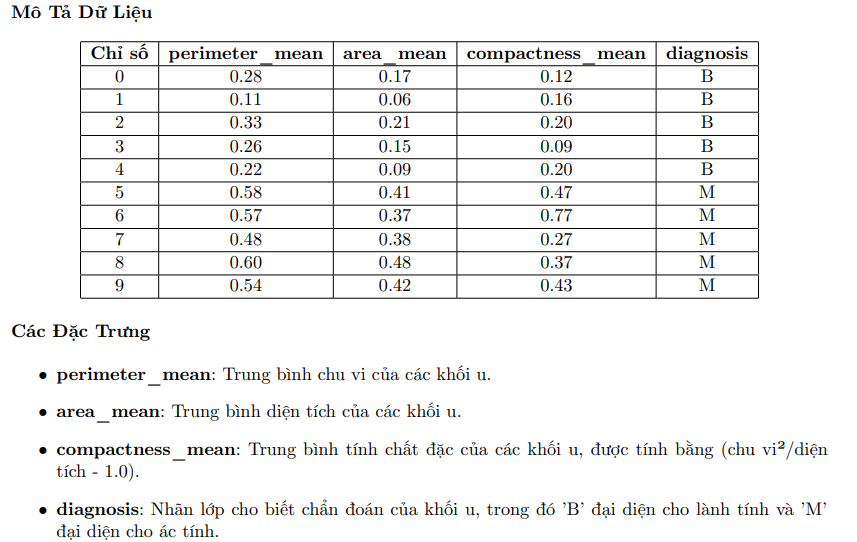

In [24]:
!gdown 1z99FO2PE35V2BHGC4oy_qC7iKYDFy8pH

import pandas as pd
df = pd.read_csv('my_data.csv')
X_train = df[["perimeter_mean", "area_mean", "compactness_mean"]].values.tolist()
labels = df['diagnosis'].values.tolist()

Downloading...
From: https://drive.google.com/uc?id=1z99FO2PE35V2BHGC4oy_qC7iKYDFy8pH
To: C:\Windows\System32\my_data.csv

  0%|          | 0.00/220 [00:00<?, ?B/s]
100%|██████████| 220/220 [00:00<?, ?B/s] 


4. Đoạn mã bên dưới chuyển đổi lớp ’B’ và lớp ’M’ lần lượt thành?
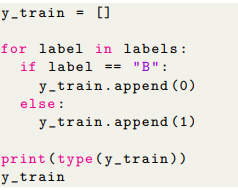

In [25]:
y_train = []

for label in labels:
    if label == "B":
        y_train.append(0)
    else:
        y_train.append(1)

print(type(y_train))
y_train

<class 'list'>


[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

5. Kết quả của mã nguồn bên dưới được hiểu như thế nào? 

In [27]:
train_data = zip(X_train, y_train)
train_data = list(train_data)
train_data

# ([perimeter_mean, area_mean, compactness_mean], Lớp)

[([0.28, 0.17, 0.12], 0),
 ([0.11, 0.06, 0.16], 0),
 ([0.33, 0.21, 0.2], 0),
 ([0.26, 0.15, 0.09], 0),
 ([0.22, 0.09, 0.2], 0),
 ([0.58, 0.41, 0.47], 1),
 ([0.57, 0.37, 0.77], 1),
 ([0.48, 0.38, 0.27], 1),
 ([0.6, 0.48, 0.37], 1),
 ([0.54, 0.42, 0.43], 1)]

6. Cho input x=[0.25, 0.25, 0.25]. Tính khoảng cách Manhattan từ x tới 3 điểm dữ liệu đầu
tiên (3 dòng đầu trong bộ dữ liệu train) là?

In [35]:
input_x = [0.25, 0.25, 0.25]

print(train_data[:3])

def manhattan_distance ( vec_1, vec_2):
    manhattan_dist = np.sum(np.abs(vec_1 - vec_2))
    return manhattan_dist

for i, (x_i, _) in enumerate(train_data[:3]):
    x_i = np.array(x_i)
    dist = manhattan_distance(x_i, input_x)
    print(np.round(dist, 2))


[([0.28, 0.17, 0.12], 0), ([0.11, 0.06, 0.16], 0), ([0.33, 0.21, 0.2], 0)]
0.24
0.42
0.17


7. Sử dụng Manhattan sắp xếp theo thứ tự tăng dần khoảng cách, nếu lấy top K=7, có tổng
cộng bao nhiêu Class 0 và 1?

In [42]:
from collections import Counter

manhattan_dists = []
for i, (xi, _) in enumerate(train_data):
    xi = np.array(xi)
    dist = manhattan_distance(xi, input_x)
    manhattan_dists.append((i,dist, _))
    
print("Danh sách ban dầu: ",manhattan_dists)
manhattan_dists.sort(key=lambda x: x[1])

print("Sau khi sắp xếp: ",manhattan_dists)
top_7 = manhattan_dists[:7]

labels = [label for _, _, label in top_7]
label_counts = Counter(labels)

print(label_counts)

Danh sách ban dầu:  [(0, 0.24000000000000002, 0), (1, 0.42000000000000004, 0), (2, 0.17, 0), (3, 0.27, 0), (4, 0.24, 0), (5, 0.71, 1), (6, 0.96, 1), (7, 0.38, 1), (8, 0.7, 1), (9, 0.64, 1)]
Sau khi sắp xếp:  [(2, 0.17, 0), (4, 0.24, 0), (0, 0.24000000000000002, 0), (3, 0.27, 0), (7, 0.38, 1), (1, 0.42000000000000004, 0), (9, 0.64, 1), (8, 0.7, 1), (5, 0.71, 1), (6, 0.96, 1)]
Counter({0: 5, 1: 2})


## Text Classification - KMean
In this section, we will process a corpus data using K-means

First, we will transform text to vector using CountVectorizer.


In [44]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd

corpus = [
    "AI is efficient",
    "fast and efficient algorithm",
    "highly accurate and fast",
    "coding AI is challenging",
    "AI may produce errors",
    "unpredictable results"
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus) # squares matrix chỉ lưu giá trị khác 0, ví dụ câu 1 tại index 1 xuất hiện 1 lần
X = X.toarray() # chuyển về numpy array đầy đủ
print(X)

[[0 1 0 0 0 0 1 0 0 0 1 0 0 0 0]
 [0 0 1 1 0 0 1 0 1 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 1 1 0 0 0 0 0]
 [0 1 0 0 1 1 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]]


Init centroid 

In [45]:
C1 = X[0]
C2 = X[4]

8. Khoảng cách Euclidean của C1 tới các sample 1, 2, 3, 5 (làm tròn tới 3 chữ số thập phân)
lần lượt là?

In [49]:
for i, vect in enumerate(X):
    dist = distance_Euclid(C1, vect)
    if i == 1 or i == 2 or i == 3 or i==5:
        print(np.round(dist, 3))
    

2.236
2.646
1.732
2.236


9.  Khoảng cách Euclidean của C2 tới các sample 1, 2, 3, 5 (làm tròn tới 3 chữ số thập phân)
lần lượt là?

In [50]:
for i, vect in enumerate(X):
    dist = distance_Euclid(C2, vect)
    if i == 1 or i == 2 or i == 3 or i==5:
        print(np.round(dist, 3))
    

2.828
2.828
2.449
2.449


10. Xác định các điểm dữ liệu thuộc cụm 1 và cụm 2: Vector biểu diễn phân cụm của bộ data
X là?

In [54]:
cluster = []
for i, vect in enumerate(X):
    dist_1 = distance_Euclid(C1, vect)
    dist_2 = distance_Euclid(C2, vect)
    if dist_1 < dist_2:
        cluster.append("C1")
    else:
        cluster.append("C2")
print(cluster)    

['C1', 'C1', 'C1', 'C1', 'C2', 'C1']


11. Cập nhật tâm cụm: Cập nhật tọa độ của tâm cụm thứ 1 và thứ 2 dựa trên các câu được
gán cho mỗi tâm cụm (Chọn đáp án gần bằng, làm tròn 1 chữ số thập phân):

In [57]:
cluster = np.array(cluster)   

C1_new = X[cluster=="C1"].mean(axis=0)
C2_new = X[cluster=="C2"].mean(axis=0)

print(C1_new)
print(C2_new)

[0.2 0.4 0.2 0.4 0.2 0.2 0.4 0.  0.4 0.2 0.4 0.  0.  0.2 0.2]
[0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0.]


12. Xác định các điểm dữ liệu thuộc cụm 1 và cụm 2 sau khi cập nhật tâm cụm (Theo vector
biểu diễn)

In [58]:
cluster = []
for i, vect in enumerate(X):
    dist_1 = distance_Euclid(C1_new, vect)
    dist_2 = distance_Euclid(C2_new, vect)
    if dist_1 < dist_2:
        cluster.append("C1")
    else:
        cluster.append("C2")
print(cluster)    

['C1', 'C1', 'C1', 'C1', 'C2', 'C1']


## Breast Cancer K-Means

In [59]:
!gdown 1z99FO2PE35V2BHGC4oy_qC7iKYDFy8pH

import pandas as pd
df = pd.read_csv('my_data.csv')
X_train = df[["perimeter_mean", "area_mean", "compactness_mean"]].values.tolist()
labels = df['diagnosis'].values.tolist()

Downloading...
From: https://drive.google.com/uc?id=1z99FO2PE35V2BHGC4oy_qC7iKYDFy8pH
To: C:\Windows\System32\my_data.csv

  0%|          | 0.00/220 [00:00<?, ?B/s]
100%|██████████| 220/220 [00:00<00:00, 219kB/s]


In [60]:
C1 = X_train[2]
C2 = X_train[8]

13. : Sử dụng Euclid tính tổng khoảng cách của các điểm dữ liệu tới tâm cụm thứ nhất C1:
[0.33, 0.21, 0.2] (Đáp án làm tròn tới 2 chữ số thập phân)

In [64]:
sum = 0

X_train = np.array(X_train)

for i, vect in enumerate(X_train):
    dist = distance_Euclid(vect, C1)
    sum += dist
print(np.round(sum,2))

2.77


14. Sử dụng Euclid tính tổng khoảng cách của các điểm dữ liệu tới tâm cụm thứ hai C2: [0.6,
0.48, 0.37] (Đáp án làm tròn tới 2 chữ số thập phân)

In [66]:
sum = 0
for i, vect in enumerate(X_train):
    dist = distance_Euclid(vect, C2)
    sum += dist
print(np.round(sum,2))

3.56


15. Xác định các điểm dữ liệu thuộc cụm 1 và cụm 2: Vector biểu diễn phân cụm của bộ
train_data là?

In [69]:
cluster = []

for i, vect in enumerate(X_train):
    dist1 = distance_Euclid(vect, C1)
    dist2 = distance_Euclid(vect, C2)
    if dist1 < dist2:
        cluster.append(0)
    else:
        cluster.append(1)
print(cluster)

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


16. : Cập nhật tọa độ của tâm cụm thứ 1 và thứ 2 dựa trên các điểm dữ liệu được gán cho mỗi
tâm cụm trước đó (Chọn đáp án gần bằng, làm tròn 2 chữ số thập phân):

In [70]:
cluster = []

for i, vect in enumerate(X_train):
    dist1 = distance_Euclid(vect, C1)
    dist2 = distance_Euclid(vect, C2)
    if dist1 < dist2:
        cluster.append(0)
    else:
        cluster.append(1)

cluster = np.array(cluster)

C1_new = X_train[cluster==0].mean(axis=0)
C2_new = X_train[cluster==1].mean(axis=0)

print(np.round(C1_new,2))
print(np.round(C2_new,2))
    

[0.24 0.14 0.15]
[0.55 0.41 0.46]


17. Xác định các điểm dữ liệu thuộc cụm 1 và cụm 2 sau khi cập nhật tâm cụm (Theo vector
biểu diễn)

In [71]:
cluster = []

for i, vect in enumerate(X_train):
    dist1 = distance_Euclid(vect, C1_new)
    dist2 = distance_Euclid(vect, C2_new)
    if dist1 < dist2:
        cluster.append(0)
    else:
        cluster.append(1)
print(cluster)

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


##  Decision Tree
In this section, we will process the Play Tenis data using Decision Tree. The data look likes:
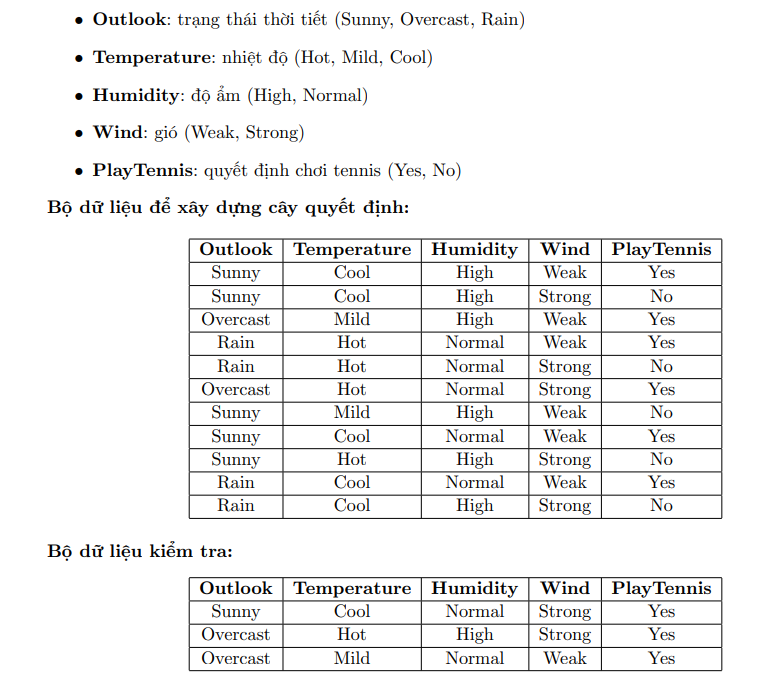

In [72]:
df_train = pd.DataFrame({
    'Outlook': ['Sunny','Sunny','Overcast','Rain','Rain','Overcast','Sunny','Sunny','Sunny','Rain','Rain'],
    'Temperature': ['Cool','Cool','Mild','Hot','Hot','Hot','Mild','Cool','Hot','Cool','Cool'],
    'Humidity': ['High','High','High','Normal','Normal','Normal','High','Normal','High','Normal','High'],
    'Wind': ['Weak','Strong','Weak','Weak','Strong','Strong','Weak','Weak','Strong','Weak','Strong'],
    'PlayTennis': ['Yes','No','Yes','Yes','No','Yes','No','Yes','No','Yes','No']
})

df_test = pd.DataFrame({
    'Outlook': ['Sunny','Overcast','Overcast'],
    'Temperature': ['Cool','Hot','Mild'],
    'Humidity': ['Normal','High','Normal'],
    'Wind': ['Strong','Strong','Weak'],
    'PlayTennis': ['Yes','Yes','Yes']
})

    

18. Entropy của tập dữ liệu ban đầu là bao nhiêu (làm tròn đến 4 chữ số thập phân)?

In [79]:
import numpy as np

def entropy(label_series):
    counts = label_series.value_counts()
    total = counts.sum()           
    ent = 0
    for count in counts:
        p = count / total
        ent -= p * np.log2(p)
    return round(ent, 4)


ent = entropy(df_train['PlayTennis'])
print("Entropy PlayTennis:", ent)


Entropy PlayTennis: 0.994


19. Với tập huấn luyện ban đầu, Information Gain của thuộc tính Temperature là bao nhiêu
(làm tròn đến 4 chữ số thập phân)?

In [80]:
def info_gain(df, feature, target):
    ent_total = entropy(df[target])

    cond_ent = 0.0
    total = len(df)
    for v, sub in df.groupby(feature):
        w = len(sub) / total
        cond_ent += w * entropy(sub[target])

    gain = ent_total - cond_ent
    return round(gain, 4)

ig_temp = info_gain(df_train, feature="Temperature", target="PlayTennis")
print(ig_temp)

0.0072


20. Thuộc tính nào sẽ được chọn để chia nhánh đầu tiên?
    => choose max value of info_gain

In [81]:
ig_temp = info_gain(df_train, feature="Temperature", target="PlayTennis")
print(ig_temp)
ig_outlook = info_gain(df_train, feature="Outlook", target="PlayTennis")
print(ig_outlook)
ig_hum = info_gain(df_train, feature="Humidity", target="PlayTennis")
print(ig_hum)
ig_wind = info_gain(df_train, feature="Wind", target="PlayTennis")
print(ig_wind)

0.0072
0.189
0.165
0.3113


21. : Cây quyết định hoàn chỉnh sẽ có bao nhiêu lá?

In [83]:
def build_tree_and_count_leaves(df, features, target, depth=0):
    # Nếu tất cả các mẫu cùng lớp → trả về lá
    if len(df[target].unique()) == 1:
        return 1  # Đây là 1 lá
    
    # Nếu không còn thuộc tính để chia → trả về lá (lớp đa số)
    if len(features) == 0:
        return 1  # Đây là 1 lá
    
    # Chọn thuộc tính tốt nhất (có IG cao nhất)
    best_feature = None
    best_ig = -1
    
    for feature in features:
        ig = info_gain(df, feature, target)
        if ig > best_ig:
            best_ig = ig
            best_feature = feature
    
    # Đếm số lá
    leaf_count = 0
    remaining_features = [f for f in features if f != best_feature]
    
    # Đệ quy cho mỗi giá trị của thuộc tính tốt nhất
    for value in df[best_feature].unique():
        subset = df[df[best_feature] == value]
        
        if len(subset) == 0:
            # Tập con rỗng → lá (lớp đa số của tập cha)
            leaf_count += 1
        else:
            # Tiếp tục xây dựng cây cho tập con
            leaf_count += build_tree_and_count_leaves(subset, remaining_features, target, depth + 1)
    
    return leaf_count

features = ['Outlook', 'Temperature', 'Humidity', 'Wind']
target = 'PlayTennis'
num_leaves = build_tree_and_count_leaves(df_train, features, target)
print(f"Cây quyết định hoàn chỉnh sẽ có {num_leaves} lá.")

Cây quyết định hoàn chỉnh sẽ có 7 lá.


22. Dùng cây quyết định đã xây dựng trên dữ liệu huấn luyện, dự đoán kết quả cho mẫu dữ
liệu sau: Outlook = Overcast, Temperature = Mild, Humidity = Normal, Wind = Weak

In [89]:
def predict_sample(sample, tree_structure):
    """
    Hàm dự đoán cho một mẫu dữ liệu
    sample: dict chứa giá trị các thuộc tính
    tree_structure: cấu trúc cây đã xây dựng
    """
    # Bắt đầu từ nút gốc (Outlook)
    current_node = "Outlook"
    value = sample["Outlook"]
    
    if value == "Overcast":
        return "Yes"  # Trả về kết quả ngay lập tức
    elif value == "Rain":
        # Sẽ tiếp tục xét thuộc tính Wind...
        pass
    elif value == "Sunny":
        # Sẽ tiếp tục xét thuộc tính Humidity...
        pass

# Mẫu cần dự đoán
sample = {
    'Outlook': 'Overcast',
    'Temperature': 'Mild', 
    'Humidity': 'Normal',
    'Wind': 'Weak'
}

# Dự đoán
prediction = predict_sample(sample, "cây_đã_xây_dựng")
print(f"Dự đoán: PlayTennis = {prediction}")

Dự đoán: PlayTennis = Yes


23. Dùng cây quyết định đã xây dựng, dự đoán kết quả cho mẫu dữ liệu sau: Outlook =
Overcast, Wind = Weak.

In [85]:
sample = {
    'Outlook': 'Overcast',
    'Wind': 'Weak'
}

# Dự đoán
prediction = predict_sample(sample, "cây_đã_xây_dựng")
print(f"Dự đoán: PlayTennis = {prediction}")

Dự đoán: PlayTennis = Yes


24. Dùng cây quyết định đã xây dựng, dự đoán kết quả cho mẫu dữ liệu sau: Temperature =
Hot, Outlook = Rain.

In [86]:
sample = {
    'Outlook': 'Rain',
    'Temperature': 'Hot'
}

# Dự đoán
prediction = predict_sample(sample, "cây_đã_xây_dựng")
print(f"Dự đoán: PlayTennis = {prediction}")

Dự đoán: PlayTennis = None


25. Độ chính xác của mô hình cây trên tập kiểm tra là bao nhiêu?

In [90]:
def predict_sample(sample):
    """
    Hàm dự đoán cho một mẫu dữ liệu dựa trên cây quyết định đã xây dựng
    sample: dict chứa giá trị các thuộc tính
    """
    # Bắt đầu từ nút gốc (Outlook)
    outlook = sample["Outlook"]
    
    if outlook == "Overcast":
        return "Yes"  # Trả về kết quả ngay lập tức
    
    elif outlook == "Rain":
        # Tiếp tục xét thuộc tính Wind
        wind = sample["Wind"]
        if wind == "Weak":
            return "Yes"
        else:  # Wind == "Strong"
            return "No"
    
    elif outlook == "Sunny":
        # Tiếp tục xét thuộc tính Humidity
        humidity = sample["Humidity"]
        if humidity == "Normal":
            return "No"
        else:  # Humidity == "High"
            # Tiếp tục xét Temperature cho nhánh Sunny-Humidity-High
            temperature = sample["Temperature"]
            # Theo cây đã xây dựng, đa số là No cho các giá trị Temperature
            return "No"


correct = 0
total = len(df_test)

for i, row in df_test.iterrows():
    actual = row['PlayTennis']
    predicted = predict_sample(row)
    
    if actual == predicted:
        correct += 1
    print(f"Mẫu {i+1}: Dự đoán = {predicted}, Thực tế = {actual}")

accuracy = (correct / total) * 100
print(f"\nĐộ chính xác trên tập kiểm tra: {accuracy:.2f}%")

Mẫu 1: Dự đoán = No, Thực tế = Yes
Mẫu 2: Dự đoán = Yes, Thực tế = Yes
Mẫu 3: Dự đoán = Yes, Thực tế = Yes

Độ chính xác trên tập kiểm tra: 66.67%
